# 1. Import and Install Dependencies

In [ ]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [6]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [68]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) 
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) 

In [67]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,200,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,216,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [64]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [69]:
draw_landmarks(frame, results)

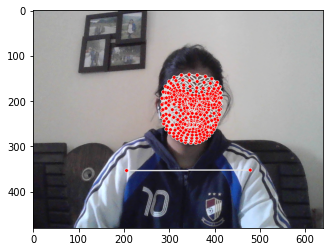

In [71]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [63]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [72]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [73]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [180]:
result_test = extract_keypoints(results)

In [181]:
result_test

array([ 0.43701464,  0.5045445 , -0.88804847, ...,  0.        ,
        0.        ,  0.        ])

In [182]:
np.save('0', result_test)

In [183]:
np.load('0.npy')

array([ 0.43701464,  0.5045445 , -0.88804847, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [87]:
import os
import numpy as np

# Path for exported data, numpy arrays
custom_path = r'D:\AI ML Project\SignLanguage'

# Joining the paths
DATA_PATH = os.path.join(custom_path, 'MP_Data')

# Actions that we try to detect
actions = np.array(['Hello', 'Thanks', 'Iloveyou','Yes','No','Goodbye','Please','Sorry'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 1

for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    
    # Check if the action directory exists, if not create it
    if not os.path.exists(action_path):
        os.makedirs(action_path)
    
    # Get the list of files in the action directory
    files_in_action = os.listdir(action_path)
    
    # Check if the action directory is not empty
    if files_in_action:
        # Convert the file names to integers and find the maximum
        dirmax = np.max(np.array(files_in_action).astype(int))
    else:
        # If the directory is empty, set a default value
        dirmax = 0
    
    for sequence in range(1, no_sequences + 1):
        try: 
            os.makedirs(os.path.join(action_path, str(dirmax + sequence)))
        except FileExistsError:
            pass
        except Exception as e:
            print(f"An error occurred while creating directories: {e}")


# 5. Collect Keypoint Values for Training and Testing

In [88]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(start_folder, start_folder+no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(500)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [86]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [184]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [185]:
label_map = {label:num for num, label in enumerate(actions)}

In [186]:
label_map

{'Hello': 0,
 'Thanks': 1,
 'Iloveyou': 2,
 'Yes': 3,
 'No': 4,
 'Goodbye': 5,
 'Please': 6,
 'Sorry': 7}

In [187]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [188]:
np.array(sequences).shape

(240, 30, 1662)

In [190]:
np.array(labels).shape

(240,)

In [191]:
X = np.array(sequences)

In [192]:
X.shape

(240, 30, 1662)

In [193]:
y = to_categorical(labels).astype(int)

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [195]:
y_test.shape

(12, 8)

# 7. Build and Train LSTM Neural Network

In [214]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [215]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [216]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))


In [217]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2)

In [220]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
8/8 [==============================] - 2s 202ms/step - loss: 1.9751 - accuracy: 0.1798
Epoch 2/2000
8/8 [==============================] - 1s 80ms/step - loss: 2.0075 - accuracy: 0.1974
Epoch 3/2000
8/8 [==============================] - 1s 82ms/step - loss: 2.0416 - accuracy: 0.1447
Epoch 4/2000
8/8 [==============================] - 1s 101ms/step - loss: 2.0418 - accuracy: 0.1447
Epoch 5/2000
8/8 [==============================] - 1s 86ms/step - loss: 2.0413 - accuracy: 0.1447
Epoch 6/2000
8/8 [==============================] - 1s 83ms/step - loss: 2.0408 - accuracy: 0.1447
Epoch 7/2000
8/8 [==============================] - 1s 82ms/step - loss: 2.0395 - accuracy: 0.1447
Epoch 8/2000
8/8 [==============================] - 1s 82ms/step - loss: 2.0386 - accuracy: 0.1447
Epoch 9/2000
8/8 [==============================] - 1s 83ms/step - loss: 2.0377 - accuracy: 0.1447
Epoch 10/2000
8/8 [==============================] - 1s 95ms/step - loss: 2.0371 - accuracy: 0.1447
Epoch 1

KeyboardInterrupt: 

In [221]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_33 (LSTM)               (None, 30, 64)            442112    
_________________________________________________________________
lstm_34 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_35 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_33 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 8)                 264       
Total params: 596,840
Trainable params: 596,840
Non-trainable params: 0
_______________________________________________

# 8. Make Predictions

In [222]:
res = model.predict(X_test)

In [223]:
res

array([[2.89064664e-02, 1.81034300e-02, 1.36045471e-01, 2.11277351e-01,
        1.16977036e-01, 4.87562358e-01, 1.13471739e-04, 1.01447117e-03],
       [4.13583933e-07, 8.34991634e-02, 1.55646751e-06, 2.00050228e-04,
        3.32991895e-03, 7.17824441e-04, 1.84596404e-02, 8.93791437e-01],
       [2.38051653e-01, 2.59661555e-01, 6.16202168e-02, 9.22984257e-02,
        3.47910792e-01, 4.55341011e-04, 2.21437816e-07, 1.81328335e-06],
       [4.07014741e-03, 1.61019973e-02, 5.94538040e-02, 2.44617134e-01,
        1.42209783e-01, 5.33147633e-01, 3.25804031e-05, 3.66974797e-04],
       [7.50605436e-03, 5.71780391e-02, 1.09016642e-01, 1.54882118e-01,
        1.29677609e-01, 5.39125085e-01, 2.03246935e-04, 2.41128076e-03],
       [9.89577770e-01, 1.61315111e-04, 2.96019949e-03, 2.85610277e-03,
        3.72785190e-03, 6.94505055e-04, 3.32306684e-07, 2.21116698e-05],
       [2.25025974e-03, 1.55656055e-01, 2.28053853e-01, 2.37755269e-01,
        1.72702208e-01, 2.02871934e-01, 1.13985247e-04, 5.

In [224]:
actions[np.argmax(res[2])]

'No'

In [225]:
actions[np.argmax(y_test[2])]

'Hello'

# 9. Save Weights

In [226]:
model.save('action.h5')

In [209]:
del model

In [227]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [228]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [229]:
yhat = model.predict(X_test)

In [230]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [231]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10,  0],
        [ 1,  1]],

       [[11,  0],
        [ 1,  0]],

       [[ 7,  1],
        [ 4,  0]],

       [[10,  2],
        [ 0,  0]],

       [[ 8,  3],
        [ 0,  1]],

       [[11,  1],
        [ 0,  0]],

       [[ 8,  0],
        [ 1,  3]]], dtype=int64)

In [232]:
accuracy_score(ytrue, yhat)

0.4166666666666667

# 11. Test in Real Time

In [233]:
from scipy import stats

In [234]:
colors = [(245,117,16), (117,245,16), (16,117,245),(252, 186, 3),(179, 52, 96),(47, 56, 224),(157, 166, 113),(44, 46, 34)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [235]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [236]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti